In [14]:
smap= pd.read_csv('SMAP_site.csv')

In [15]:
smap.set_index('Unnamed: 0', inplace=True)
smap.index= pd.to_datetime(smap.index, format='%Y%m%d')

In [19]:
smap= smap.sort_index()

In [21]:
smap[smap==-9999]= np.nan

In [26]:
smap.apply(lambda x: len(x[~pd.isna(x)])/len(smap), axis=0).argmax()

'6'

In [27]:
smap['6']

Unnamed: 0
2015-04-01    0.088007
2015-04-02    0.107143
2015-04-03         NaN
2015-04-04    0.065996
2015-04-05    0.060645
                ...   
2020-01-26    0.169054
2020-01-28    0.156664
2020-01-29    0.161368
2020-01-30    0.232975
2020-01-31         NaN
Name: 6, Length: 1729, dtype: float64

In [30]:
ilocs= smap[pd.isna(smap['6'])].index

In [32]:
import datetime

In [34]:
datetime.timedelta(days=1)

datetime.timedelta(1)

In [56]:
noah= pd.read_csv('Noah_site.csv')

In [57]:
noah.set_index('Unnamed: 0', inplace=True)
noah.index= pd.to_datetime(noah.index, format='%Y%m%d %H:%M:%S')
noah= noah.sort_index()

In [59]:
noah.min().min()

4.840155601501465

In [ ]:
noah= pd.read_csv('mesonet.csv')

In [61]:
noah.tail()

,110,1,2,116,135,111,126,6,8,9,10,11,12,14,15,...,94,95,137,97,136,99,100,101,102,132,104,105,106,107,108
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-02 19:00:00,16.099824,19.780000,18.940156,21.780000,21.020234,15.070039,18.500215,15.349824,30.000215,24.960176,18.409883,25.809785,18.219941,25.980195,19.909883,...,13.050019,19.270234,25.289765,28.360078,16.619843,20.739961,16.420136,19.369843,25.509980,27.679902,29.469941,26.460176,30.429902,16.159883,19.960176
2019-07-02 20:00:00,16.030195,19.709883,18.899824,21.680098,20.959883,14.999922,18.430098,15.280195,29.740156,24.850019,18.330000,25.700117,18.140059,25.830000,19.850019,...,12.999922,19.200117,25.089766,28.280195,16.539961,20.660078,16.339766,19.280195,25.399824,27.129805,29.129805,26.280195,30.160078,16.080000,19.910078
2019-07-02 21:00:00,15.979785,19.650195,19.999804,21.590137,20.900195,14.940234,18.360156,15.240039,29.479785,24.749804,18.260058,25.599902,18.209765,25.709765,19.789844,...,13.200000,19.130176,24.909961,28.209765,16.479785,20.570117,16.269824,19.190234,25.300097,26.700000,28.860156,26.119922,29.940234,16.010058,19.860156
2019-07-02 22:00:00,15.930214,19.600136,20.609901,21.509804,20.850136,14.919960,18.299843,15.180214,29.230019,24.660194,18.189980,25.520058,23.750038,25.609901,19.730019,...,13.410194,19.080116,24.759804,28.149940,16.450233,20.500038,16.219765,19.109901,25.219765,26.359901,28.649940,25.989784,29.770058,16.129921,19.810097
2019-07-02 23:00:00,15.889960,19.550117,20.670234,21.439765,20.809882,14.900214,18.249824,15.130195,29.019843,24.599921,18.139960,25.530097,23.630195,26.539863,19.689765,...,13.380195,19.030097,24.659980,28.119941,16.400214,20.439765,16.159980,19.050117,25.159980,26.079902,28.570136,25.869941,29.630195,16.079902,19.769843


In [62]:
from_dates=[]
to_dates= []
first=True
for i in range(len(ilocs)-1):
    if first:
        from_date=smap.index[0]
        to_date=ilocs[0] - datetime.timedelta(days=1)
        first=False
    else:
        from_date= ilocs[i] + datetime.timedelta(days=1)
        to_date= ilocs[i+1]- datetime.timedelta(days=1)
    from_dates.append(from_date)
    to_dates.append(to_date)

from_dates.append(pd.to_datetime('20150401'))
to_dates.append(pd.to_datetime('20190702'))
from_dates.append(pd.to_datetime('20150401'))
to_dates.append(pd.to_datetime('20190702'))

In [68]:
import altair as alt
data = pd.DataFrame()
data['from']= from_dates
data['to']= to_dates
data['product']= 'smap'
data['product'].iloc[-1]= 'Mesonet'
data['product'].iloc[-2]= 'Noah'

In [43]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [69]:
data

,from,to,product
0,2015-04-01,2015-04-02,smap
1,2015-04-12,2015-04-18,smap
2,2015-04-20,2015-05-11,smap
3,2015-05-13,2015-05-13,smap
4,2015-05-15,2015-05-14,smap
...,...,...,...
215,2020-01-19,2020-01-22,smap
216,2020-01-24,2020-01-23,smap
217,2020-01-25,2020-01-30,smap
218,2015-04-01,2019-07-02,Noah


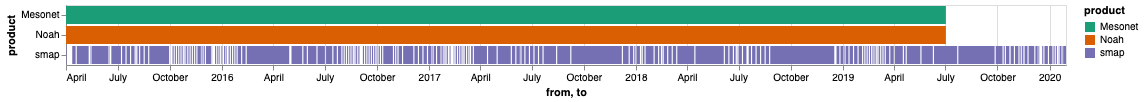

In [70]:

alt.Chart(data).mark_bar().encode(
    x='from',
    x2='to',
    y='product',
    color=alt.Color('product', scale=alt.Scale(scheme='dark2'))
).properties(width=1000).configure_axis()